In [1]:
import torch as tn
import torchtt as tntt
import TTCME
import matplotlib.pyplot as plt 
import scipy.integrate
import numpy as np
import datetime

tn.set_default_tensor_type(tn.DoubleTensor)

r1 = TTCME.ChemicalReaction(['mRNA','protein'],'mRNA->mRNA+protein', 0.015)
r2 = TTCME.ChemicalReaction(['mRNA','protein'],'mRNA->', 0.002)
r3 = TTCME.ChemicalReaction(['mRNA','protein'],'->mRNA', 0.1)
r4 = TTCME.ChemicalReaction(['mRNA','protein'],'protein->', 0.01)

rs = TTCME.ReactionSystem(['mRNA','protein'],[r1, r2, r3, r4])


N = [80,120] 

Att = rs.generatorTT(N)

integrator = TTCME.TimeIntegrator.TTInt(Att, N_max=16, dt_max = 100, method='cheby')

p0 = TTCME.pdf.SingularPMF(N,[2,4])
p = p0.copy()

dt = 16 

time = 0
Ps = [p.dofs.numpy()]
for i in range(64):
    tme = datetime.datetime.now()
    p.dofs = integrator.solve(p.dofs, dt, intervals = 1)
    tme = datetime.datetime.now() - tme
    time += dt
    print('t = %g, solver time %g s'%(time,tme.total_seconds()))
    Ps.append(p.dofs.numpy())



/home/yonnss/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


t = 16, solver time 6.91673 s
t = 32, solver time 4.95003 s
t = 48, solver time 3.63358 s
t = 64, solver time 11.2963 s
t = 80, solver time 5.10089 s
t = 96, solver time 4.65329 s
t = 112, solver time 4.5511 s
t = 128, solver time 2.95366 s
t = 144, solver time 4.66228 s
t = 160, solver time 3.37397 s
t = 176, solver time 4.28301 s
t = 192, solver time 4.78029 s
t = 208, solver time 5.06247 s
t = 224, solver time 4.43183 s
t = 240, solver time 2.52518 s
t = 256, solver time 6.96283 s
t = 272, solver time 11.9457 s
t = 288, solver time 5.59579 s
t = 304, solver time 4.70149 s
t = 320, solver time 4.32029 s
t = 336, solver time 5.81203 s
t = 352, solver time 4.98796 s
t = 368, solver time 2.55791 s
t = 384, solver time 6.10965 s
t = 400, solver time 2.45058 s
t = 416, solver time 4.03514 s
t = 432, solver time 3.83135 s
t = 448, solver time 2.97268 s
t = 464, solver time 2.04144 s
t = 480, solver time 2.38884 s
t = 496, solver time 3.48005 s
t = 512, solver time 1.54172 s
t = 528, solver

In [2]:
Asp = rs.generator_sparse(N)

res = scipy.integrate.solve_ivp(lambda t,y: Asp.dot(y), [0,time],p0.dofs.numpy().flatten(),max_step=time/10000)
Pt = res.y.reshape(N+[-1])
p_ref = Pt[:,:,-1]

Text(0, 0.5, '$x_2$')

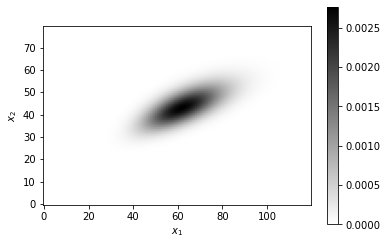

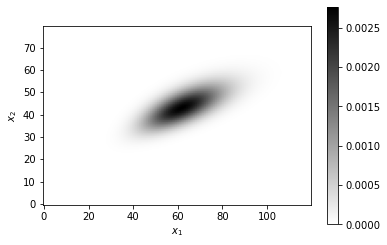

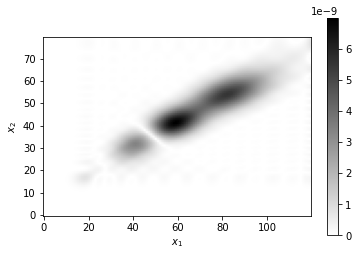

In [3]:
plt.figure()
plt.imshow(p.dofs.full(), origin='lower',cmap='gray_r')
plt.colorbar()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.figure()
plt.imshow(p_ref, origin='lower',cmap='gray_r')
plt.colorbar()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.figure()
plt.imshow(np.abs(p.dofs.numpy()-p_ref), origin='lower',cmap='gray_r')
plt.colorbar()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')